## Fast Text

### 什么是fastText?

fastText 引入了子词嵌入（subword embedding），它捕捉单词的内部结构和形态学关系。例如，“dog”、“dogs”和“dogcatcher”共享词根“dog”，但通过不同的后缀来改变词义。而在Word2Vec中，不同形式的单词会被分配不同的向量。fastText 利用子词信息来建立相似单词之间的关系。

在fastText中，文本分类的过程中也会生成词嵌入，除非你使用预训练的嵌入进行训练。

### n-gram表示单词

在Word2Vec中，每个单词被视为原子单位，忽略了单词之间的形态特征。为了解决这个问题，fastText 使用字符级的 n-gram 来表示单词。例如，对于单词 “book”，当 n=3 时，它的三元组为：

- `<bo`, `boo`, `ook`, `ok>`

这些三元组用来表示单词的向量。这种方法的好处是：

1. 改善了低频词汇的词向量生成效果。
2. 可以为训练词汇表之外的单词生成向量。


### fastText 的优点：
1. **适用于大规模数据：** 能在10分钟内处理超过10亿个词汇。
2. **支持多语言：** 适用于包括英语、德语、西班牙语、法语等多种语言。
3. **专注于文本分类：** 在情感分析和标签预测等标准问题上表现优异。

## Architecture

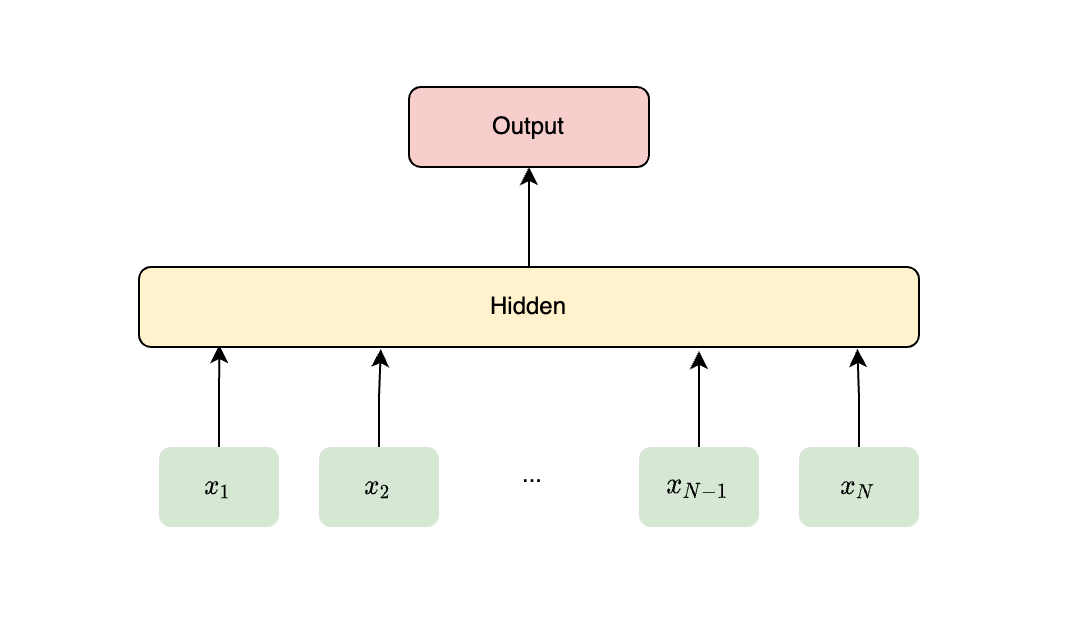

## Implementation

### Data Prepare

清华大学的新闻分类文本数据集下载：https://thunlp.oss-cn-qingdao.aliyuncs.com/THUCNews.zip

下载后进行解压，把相应的中文目录替换成以下英文名，方便程序读取数据

['affairs','constellation','economic','edu','ent','fashion','game','home','house','lottery','science','sports','society','stock']

### Import Library

In [3]:
import jieba
import os

In [7]:
base_path = "/Users/dengkai/workspace/machine-learning/NLP/data_set/nlp/fastText/"
dir_name = "THUCNews/"
path = base_path + dir_name
dir_list = ['体育','娱乐','家居','彩票','房产','教育','时尚','时政','星座','游戏','社会','科技','股票','财经']

training_data = open("news_fasttext_train.txt", "w")
test_data = open("news_fasttext_test.txt", "w")

num = -1
for e in dir_list:
    num += 1
    input_path = path + e + '/'
    files = os.listdir(input_path)
    count = 0
    for fileName in files:
        count += 1
        file_path = input_path + fileName
        with open(file_path, 'r') as fr:
            text = fr.read()
        text = str(text.encode("utf-8"), 'utf-8')
        seg_text = jieba.cut(text.replace("\t", " ").replace("\n", " "))
        outline = " ".join(seg_text)
        outline = outline + "\t__lable__" + e + "\n"
        
        if count < 10000:
            training_data.write(outline)
            training_data.flush()
            continue
        elif count < 20000:
            test_data.write(outline)
            test_data.flush()
            continue
        else:
            break
training_data.close()
test_data.close()
print("finished data input!")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4l/s0_5bfp95ybfwcnzh06g6h080000gn/T/jieba.cache
Loading model cost 0.298 seconds.
Prefix dict has been built successfully.


完成输出数据!


In [18]:
training_data

<_io.TextIOWrapper name='news_fasttext_train.txt' mode='w' encoding='UTF-8'>

In [8]:
import fasttext
model = fasttext.train_supervised("news_fasttext_train.txt", label_prefix="__label__")
print("finished training")

Read 72M words
Number of words:  664889
Number of labels: 0


finished training


Progress: 100.0% words/sec/thread: 20023041 lr:  0.000000 avg.loss:       nan ETA:   0h 0m 0s


In [16]:
model = fasttext.train_supervised("news_fasttext_train.txt", label_prefix="__label__", lr=0.1)

Read 72M words
Number of words:  664889
Number of labels: 0
Progress: 100.0% words/sec/thread: 19752229 lr:  0.000000 avg.loss:       nan ETA:   0h 0m 0s


In [17]:
result = model.test("news_fasttext_test.txt")
print('precision:', result[1])

precision: nan
